In [2]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL  


In [34]:
import cv2
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
PATH = r"C:\Users\Malini Devi\Documents\Python Scripts\Hckerearth\Dance\dataset"
train_dir = os.path.join(PATH, 'train\\')
validation_dir = os.path.join(PATH, 'test\\')
train_dir

'C:\\Users\\Malini Devi\\Documents\\Python Scripts\\Hckerearth\\Dance\\dataset\\train\\'

In [6]:
train =  pd.read_csv("train.csv")

In [7]:
label_path = r"C:\Users\Malini Devi\Documents\Python Scripts\Hckerearth\Dance\dataset\train_with_label\\"
for i in range(train.shape[0]):
    im1 = Image.open(train_dir+train["Image"][i])
    im1.save(label_path+train["target"][i]+train["Image"][i])

## Setting up the directory

In [8]:
PATH_L = r"C:\Users\Malini Devi\Documents\Python Scripts\Hckerearth\Dance\dataset\learning\\"
train_dir = os.path.join(PATH_L, 'train')
validation_dir = os.path.join(PATH_L, 'test')

In [9]:
train_cats_dir = os.path.join(train_dir, 'bharathanatyam')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'Kathak')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'bharathanatyam')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'Kathak')  # directory with our validation dog pictures

In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [11]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 38
total training dog images: 44
total validation cat images: 9
total validation dog images: 8
--
Total training images: 82
Total validation images: 17


In [111]:
batch_size = 2
epochs = 5
IMG_HEIGHT = 224
IMG_WIDTH = 224

### Data Preparation

In [112]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [113]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 82 images belonging to 2 classes.


In [114]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 17 images belonging to 2 classes.


In [115]:
sample_training_images, _ = next(train_data_gen)

In [116]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

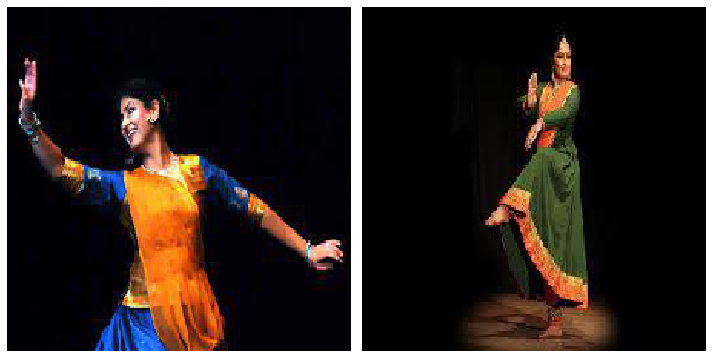

In [117]:
plotImages(sample_training_images[:2])

## Model Building

In [118]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(1)
])

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

## Train the model

In [121]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
    )

Epoch 1/5
41/41 [==============================] - 15s 358ms/step - loss: 0.9657 - accuracy: 0.5366 - val_loss: 0.8830 - val_accuracy: 0.5000
Epoch 2/5
41/41 [==============================] - 15s 357ms/step - loss: 0.6891 - accuracy: 0.5854 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 3/5
41/41 [==============================] - 15s 355ms/step - loss: 0.4108 - accuracy: 0.7317 - val_loss: 0.6179 - val_accuracy: 0.6250
Epoch 4/5
41/41 [==============================] - 15s 357ms/step - loss: 0.1858 - accuracy: 0.9024 - val_loss: 0.6029 - val_accuracy: 0.6875
Epoch 5/5
41/41 [==============================] - 14s 353ms/step - loss: 0.0533 - accuracy: 0.9756 - val_loss: 1.6822 - val_accuracy: 0.5625


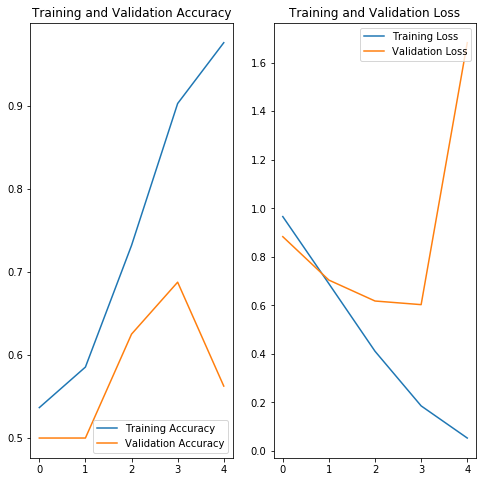

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Prediction

In [123]:
classes = train_data_gen.class_indices    
print(classes)

{'Kathak': 0, 'bharathanatyam': 1}


In [128]:
chk = r"C:\Users\Malini Devi\Documents\Python Scripts\Hckerearth\Dance\dataset\k_1.png"
img = cv2.imread(chk)
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

In [129]:
pred = model.predict_classes(img)
if pred[0][0]==0:
    print("Kathakali")
else:
    print("Bharathanatyam")

Kathakali


# Part II Data Augmentation - Apply horizantal Flip

In [46]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [47]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 82 images belonging to 2 classes.


In [48]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]

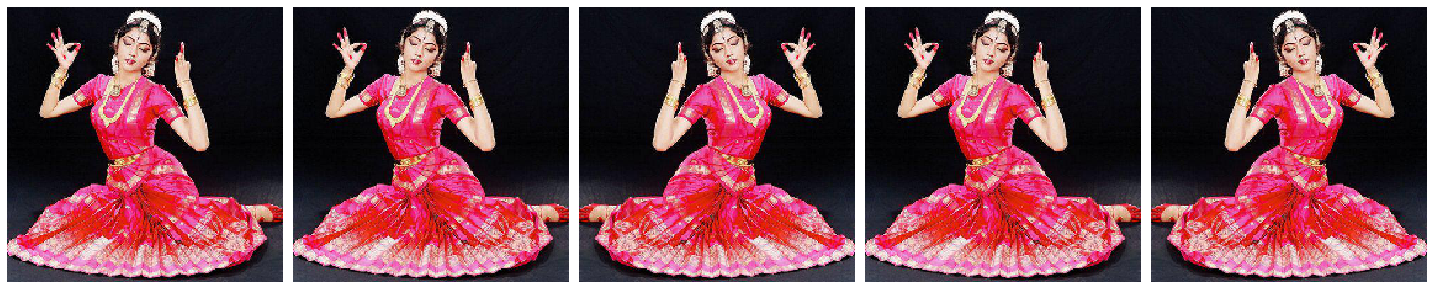

In [49]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

### Randomly rotating the image

In [50]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [51]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 82 images belonging to 2 classes.


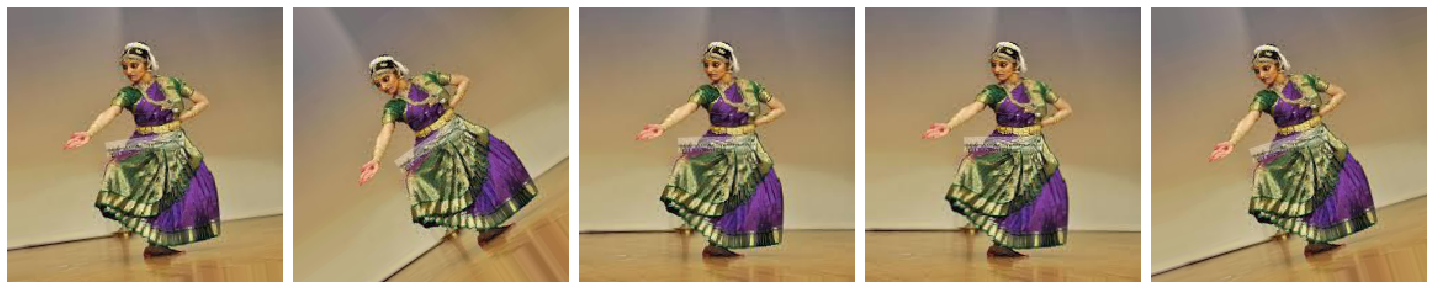

In [52]:
plotImages(augmented_images)

### Apply zoom augmentation

In [53]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [54]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 82 images belonging to 2 classes.


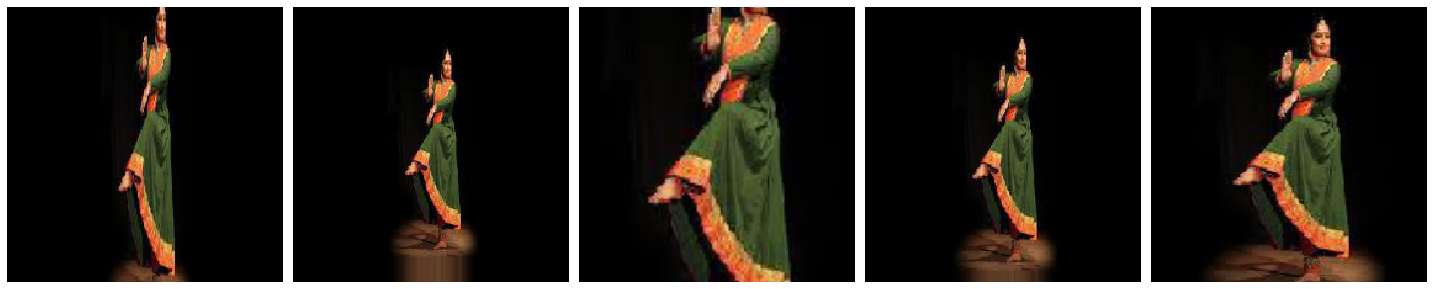

In [55]:
plotImages(augmented_images)


### Put it all together

In [56]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [57]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 82 images belonging to 2 classes.


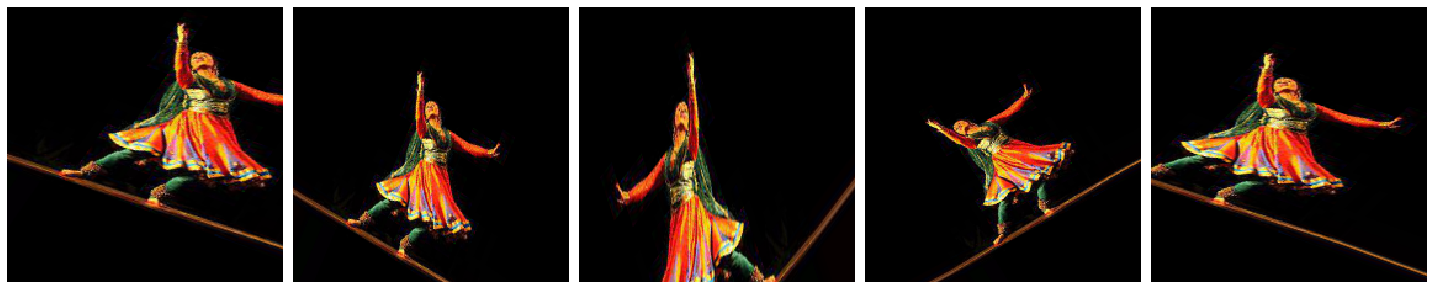

In [58]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Create Validation data Generator

In [59]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [60]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 17 images belonging to 2 classes.


### With Dropout

In [61]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

### Compile the model

In [62]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

### Train the model

In [130]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)